In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '../datasets/data/train_sample.csv'
df = pd.read_csv(filename)

In [3]:
df.columns

Index(['Unnamed: 0', 'srch_id', 'date_time', 'site_id',
       'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'random_bool',
       'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate',
       'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff'

In [4]:
null_counts = df.isnull().sum()
refined_cols = null_counts[null_counts <500000]
refined_cols

Unnamed: 0                          0
srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1434
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           217893
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance      321173
random_bool                         0
click_bool                          0
booking_bool

In [5]:
cols = []
for items in refined_cols.iteritems():
    cols.append(items[0])

In [6]:
df = df.filter(cols, axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,50984,2,0.0,0,1.61,...,1,0,4,0,1,1,NaN,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,85728,2,3.0,1,1.79,...,1,0,4,0,1,1,NaN,1,0,0
2,4,2012-12-31 08:59:22,5,219,219,75491,2,3.5,0,3.22,...,2,46,1,0,1,1,238.30,1,0,0
3,6,2013-06-05 12:27:51,14,100,100,104251,3,4.0,1,1.95,...,1,5,2,0,1,0,652.84,0,1,1
4,8,2013-03-20 17:50:44,5,219,219,33805,3,3.5,1,3.14,...,1,0,1,0,1,0,3.83,0,0,0


In [8]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
orig_destination_distance      float64
random_bool                      int64
click_bool                       int64
booking_bool             

In [9]:
df.max()

srch_id                                     665573
date_time                      2013-06-30 23:58:24
site_id                                         34
visitor_location_country_id                    231
prop_country_id                                230
prop_id                                     140820
prop_starrating                                  5
prop_review_score                                5
prop_brand_bool                                  1
prop_location_score1                          6.98
prop_location_score2                             1
prop_log_historical_price                     6.21
position                                        40
price_usd                              3.23512e+06
promotion_flag                                   1
srch_destination_id                          28416
srch_length_of_stay                             59
srch_booking_window                            498
srch_adults_count                                9
srch_children_count            

### maybe change dtypes to float16 or int16 except some

In [10]:
df.isnull().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1434
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           217893
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance      321173
random_bool                         0
click_bool                          0
booking_bool                        0
dtype: int64

### maybe do seperate analysis for `prop_location_score2` and `orig_destination_distance` but drop for now

In [11]:
df = df.drop(['prop_location_score2','orig_destination_distance']  , axis=1)

In [12]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,50984,2,0.0,0,1.61,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,85728,2,3.0,1,1.79,...,23246,1,0,4,0,1,1,1,0,0
2,4,2012-12-31 08:59:22,5,219,219,75491,2,3.5,0,3.22,...,12588,2,46,1,0,1,1,1,0,0
3,6,2013-06-05 12:27:51,14,100,100,104251,3,4.0,1,1.95,...,21106,1,5,2,0,1,0,0,1,1
4,8,2013-03-20 17:50:44,5,219,219,33805,3,3.5,1,3.14,...,7082,1,0,1,0,1,0,0,0,0


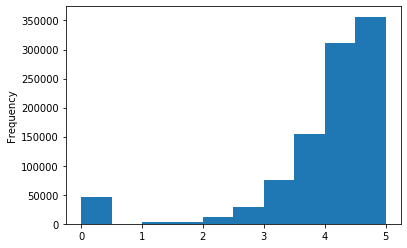

In [13]:
df['prop_review_score'].plot.hist()

### fill prop_review_score with median 

In [14]:
df['prop_review_score'].dtype

dtype('float64')

In [15]:
pd.to_numeric(df['prop_review_score'], errors='coerce')

0         0.0
1         3.0
2         3.5
3         4.0
4         3.5
         ... 
991748    4.0
991749    3.5
991750    4.0
991751    5.0
991752    4.0
Name: prop_review_score, Length: 991753, dtype: float64

In [16]:
# def custom_func(num_str):
#     if pd.isnull(num_str):
#         return num_str
# abc = df['prop_review_score'].map(custom_func)

In [17]:
df['prop_review_score'].fillna((df['prop_review_score'].median()), inplace=True)

In [18]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,50984,2,0.0,0,1.61,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,85728,2,3.0,1,1.79,...,23246,1,0,4,0,1,1,1,0,0
2,4,2012-12-31 08:59:22,5,219,219,75491,2,3.5,0,3.22,...,12588,2,46,1,0,1,1,1,0,0
3,6,2013-06-05 12:27:51,14,100,100,104251,3,4.0,1,1.95,...,21106,1,5,2,0,1,0,0,1,1
4,8,2013-03-20 17:50:44,5,219,219,33805,3,3.5,1,3.14,...,7082,1,0,1,0,1,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991753 entries, 0 to 991752
Data columns (total 24 columns):
srch_id                        991753 non-null int64
date_time                      991753 non-null object
site_id                        991753 non-null int64
visitor_location_country_id    991753 non-null int64
prop_country_id                991753 non-null int64
prop_id                        991753 non-null int64
prop_starrating                991753 non-null int64
prop_review_score              991753 non-null float64
prop_brand_bool                991753 non-null int64
prop_location_score1           991753 non-null float64
prop_log_historical_price      991753 non-null float64
position                       991753 non-null int64
price_usd                      991753 non-null float64
promotion_flag                 991753 non-null int64
srch_destination_id            991753 non-null int64
srch_length_of_stay            991753 non-null int64
srch_booking_window            9

In [20]:
df['prop_review_score'].values

array([0. , 3. , 3.5, ..., 4. , 5. , 4. ])

In [21]:
to_sns = df.drop('date_time', axis=1)

In [22]:
# fig, ax = plt.subplots(figsize=(20,8))         # Sample figsize in inches
# sns.heatmap(to_sns)

In [23]:
# sns.distplot(to_sns['prop_review_score'])

In [24]:
# ax = sns.regplot(x=df['price_usd'], y=df['click_bool'])

In [25]:
# ax = sns.scatterplot(x=df['prop_review_score'], y=df['price_usd'])

In [26]:
# ax = sns.scatterplot(x=df['srch_length_of_stay'], y=df['price_usd'])

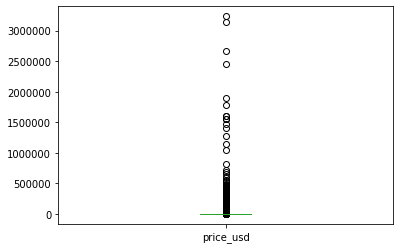

In [27]:
df['price_usd'].plot.box()

In [28]:
df['price_usd'].max(), df['price_usd'].min(), df['price_usd'].mean(), df['price_usd'].median()

(3235118.0, 0.0, 222.32683981797885, 122.0)

In [29]:
price = df[['visitor_location_country_id', 'prop_country_id', 'prop_starrating', 'prop_id', 'srch_length_of_stay', 'position', 'promotion_flag', 'price_usd']][df['price_usd'] > 10000]

In [30]:
price.head(30)

,visitor_location_country_id,prop_country_id,prop_starrating,prop_id,srch_length_of_stay,position,promotion_flag,price_usd
1140,160,23,5,24349,2,27,0,13392.00
1141,160,23,5,24788,2,2,0,17410.00
1143,160,23,4,111036,2,31,0,13303.00
7069,59,59,5,93869,3,6,0,12355.00
7691,219,219,2,19018,3,19,0,97739.00
7692,219,219,4,20362,3,15,1,211411.00
7693,219,219,4,21721,3,8,0,250892.00
7694,219,219,4,66702,3,4,1,176022.00
7695,219,219,2,130415,3,9,0,114042.00
7933,100,100,4,848,1,8,1,17108.65


In [31]:
price.describe()

,visitor_location_country_id,prop_country_id,prop_starrating,prop_id,srch_length_of_stay,position,promotion_flag,price_usd
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,3.690000e+02
mean,155.363144,160.940379,3.728997,69023.249322,2.647696,15.308943,0.346883,1.786207e+05
std,65.956988,72.858758,0.979268,42941.318878,2.216662,9.025745,0.476625,3.954096e+05
min,10.000000,4.000000,0.000000,640.000000,1.000000,1.000000,0.000000,1.006700e+04
25%,92.000000,98.000000,3.000000,29938.000000,1.000000,7.000000,0.000000,1.570900e+04
50%,181.000000,206.000000,4.000000,71379.000000,2.000000,15.000000,0.000000,4.722892e+04
75%,219.000000,219.000000,4.000000,105534.000000,3.000000,24.000000,1.000000,1.727610e+05
max,220.000000,225.000000,5.000000,140696.000000,14.000000,32.000000,1.000000,3.235118e+06


In [32]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 1140 to 990794
Data columns (total 8 columns):
visitor_location_country_id    369 non-null int64
prop_country_id                369 non-null int64
prop_starrating                369 non-null int64
prop_id                        369 non-null int64
srch_length_of_stay            369 non-null int64
position                       369 non-null int64
promotion_flag                 369 non-null int64
price_usd                      369 non-null float64
dtypes: float64(1), int64(7)
memory usage: 25.9 KB


In [33]:
df['prop_country_id'].unique()

array([219, 100, 158,  31, 216,  15,  98,  55,  30, 137, 215,  56, 129,
        99,  53, 181,  35,  59, 132, 127, 109, 195, 131,  70, 220,  13,
        92,  91, 113, 117, 205,  14,  41, 164,   9, 138, 194, 103,  50,
        81,   4, 202, 102,  73,  26,  39,  23, 230,  60,  32, 125,  16,
       225, 157, 145, 221, 151,  71,  10,  80,  68,  77,  61, 153, 178,
       182,  48, 119, 206, 156,  18, 134, 173,  88, 223,  97, 123,   2,
       211, 184, 213, 154, 187,  37, 189,  33, 212,  21,  17,  45,  74,
       229,  47, 224, 200, 149,  27, 122,  93,  69,  63, 106,  83,  42,
        34, 197,  96, 159, 152, 161,  76, 186,  38, 196, 163,  86, 124,
       172, 155,  51,  11,  40, 214, 177, 162, 201,  22,  90, 169, 171,
       179, 143, 146, 203,  72, 136, 141, 128,  20, 120, 111,  57,  25,
        44,  65, 160, 180,  82, 190,  89, 167, 226, 112, 140,   1,  87,
       207, 222,  46, 208,   7, 192, 185, 108,  79, 135, 126, 217, 165,
        62])

In [34]:
len(df['prop_id'].unique())

99674

In [35]:
price['prop_id'].unique()

array([ 24349,  24788, 111036,  93869,  19018,  20362,  21721,  66702,
       130415,    848,  17829,  63987,  87695,  67619,  80832,  99219,
       125744,  18575,  65797,  66347, 101134,  30414,  57843,  42875,
       121665, 137592,   2108,  82281, 123400,  38114, 100787, 102981,
          715,  25857,  92295, 135426,  38835,  30713,  93081, 121048,
        30422,  79033,  10944,  17349,  97757,  93660,   5119,  24723,
       118778, 125176, 129484,  87341,   1352,  99656,   2275,  58072,
        63097, 113274,  54310, 114255, 136758,  50349,  75711,  97600,
        19268,  47567,  84176, 130144,  26823, 129506,  91209, 117019,
       100503, 105382,  12500,  52515,  73379, 139000,  63437,  86986,
       120479,  53684,  75314,  42712, 139153,  37346,  69261,  86639,
       121267, 129968,  87788, 109731,   2351,   8559,  73200,   7881,
        45554,  72731, 110663,  24236,  83194, 136709,   6271,  56330,
       131608,  11218, 118653,  62779, 105860,   4472,  98159, 118314,
      

In [36]:
# ax = sns.swarmplot(x='srch_length_of_stay', y='price_usd', data=df)

In [37]:
df.groupby("srch_length_of_stay")['price_usd'].max()

srch_length_of_stay
1     2675964.43
2     1893058.00
3     1556698.00
4     3235118.00
5      488482.00
6        8322.00
7      822602.80
8      181028.00
9       15641.90
10       9171.03
11     215455.00
12       3035.41
13      11337.68
14      11672.00
15       2400.00
16       3221.08
17        734.81
18        802.97
19       1180.47
20        725.95
21       1989.60
22        995.52
23        566.59
24        435.00
25        749.39
26        450.00
27        608.00
28       1828.00
29        200.00
30        360.00
31        257.00
32        170.78
33         72.00
34        283.00
38        168.09
40        168.39
44        129.00
57        126.02
58        104.84
59         58.00
Name: price_usd, dtype: float64

In [38]:
df.groupby("srch_length_of_stay")['price_usd'].min()

srch_length_of_stay
1       0.00
2       0.00
3       0.01
4       0.05
5       1.31
6       0.05
7       1.46
8       4.87
9       2.73
10      2.93
11     18.00
12      2.51
13     17.28
14      9.55
15     12.55
16     11.97
17      0.01
18     18.00
19     23.00
20     13.00
21     16.08
22     18.87
23      3.09
24     16.00
25     22.00
26     48.79
27     39.00
28     19.71
29     52.00
30     29.00
31     48.00
32    170.78
33     43.00
34     51.00
38     54.13
40     84.95
44     95.00
57    126.02
58     60.13
59     58.00
Name: price_usd, dtype: float64

### something fishy here

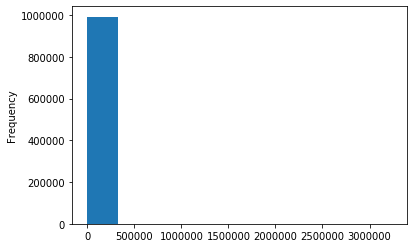

In [39]:
df['price_usd'].plot.hist()

In [40]:
df.srch_length_of_stay.unique()

array([ 1,  2,  4,  3,  6,  9,  5,  8,  7, 14, 12, 10, 15, 11, 17, 27, 28,
       25, 13, 18, 16, 21, 22, 20, 24, 19, 30, 23, 26, 57, 44, 34, 29, 33,
       40, 38, 31, 58, 59, 32])

In [41]:
df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
count,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,...,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000,991753.000000
mean,332874.976448,9.958732,175.315861,173.901793,70133.912577,3.180185,3.777707,0.634428,2.876867,4.316622,...,14059.065737,2.388559,37.540259,1.973383,0.349983,1.111197,0.500314,0.296197,0.045106,0.028151
std,192248.159545,7.648275,65.893881,68.358062,40638.628025,1.051863,1.050099,0.481590,1.532214,1.836935,...,8113.922789,2.063918,51.909769,0.857937,0.730922,0.425441,0.500000,0.456579,0.207537,0.165405
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,166362.000000,5.000000,100.000000,100.000000,35034.000000,3.000000,3.500000,0.000000,1.790000,4.440000,...,7104.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,333011.000000,5.000000,219.000000,219.000000,69645.000000,3.000000,4.000000,1.000000,2.770000,4.910000,...,13580.000000,2.000000,17.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,499803.000000,14.000000,219.000000,219.000000,105334.000000,4.000000,4.500000,1.000000,4.040000,5.310000,...,21109.000000,3.000000,49.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,665573.000000,34.000000,231.000000,230.000000,140820.000000,5.000000,5.000000,1.000000,6.980000,6.210000,...,28416.000000,59.000000,498.000000,9.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000


### Not considering `price_usd >5000`

In [42]:
df = df[df.price_usd<5000]

In [43]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price',
       'position', 'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool'],
      dtype='object')

In [44]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
random_bool                      int64
click_bool                       int64
booking_bool                     int64
dtype: object

In [45]:
data = df.drop('date_time', axis=1)
data.to_csv('../datasets/data/processed.csv')

In [46]:
data.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,12,187,219,50984,2,0.0,0,1.61,4.14,...,23246,1,0,4,0,1,1,1,0,0
1,1,12,187,219,85728,2,3.0,1,1.79,4.50,...,23246,1,0,4,0,1,1,1,0,0
2,4,5,219,219,75491,2,3.5,0,3.22,5.52,...,12588,2,46,1,0,1,1,1,0,0
3,6,14,100,100,104251,3,4.0,1,1.95,0.00,...,21106,1,5,2,0,1,0,0,1,1
4,8,5,219,219,33805,3,3.5,1,3.14,4.89,...,7082,1,0,1,0,1,0,0,0,0


In [47]:
# X = data.iloc[:, :-1]
# y = data.iloc[:, -2:-1]

In [48]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
# from sklearn.tree import DecisionTreeClassifier

# parameters = {'max_depth': [3, 10, None]}
# decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)

# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(decision_tree, parameters, cv=3, scoring='roc_auc')
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

In [50]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)
# print(clf.feature_importances_)
# y_pred = clf.predict(X_test)

In [51]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

In [52]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

### Accuracy good but it did not consider the click_bool 1.. problem!!!

In [53]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(solver='lbfgs', class_weight="balanced", max_iter=10000)
# log_reg.fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)
# print(classification_report(y_test, y_pred))

In [54]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=0, n_jobs=1, class_weight="balanced")
# clf.fit(X_train, y_train)
# clf.predict(X_test)
# print(classification_report(y_test, y_pred))

In [55]:
data.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,12,187,219,50984,2,0.0,0,1.61,4.14,...,23246,1,0,4,0,1,1,1,0,0
1,1,12,187,219,85728,2,3.0,1,1.79,4.50,...,23246,1,0,4,0,1,1,1,0,0
2,4,5,219,219,75491,2,3.5,0,3.22,5.52,...,12588,2,46,1,0,1,1,1,0,0
3,6,14,100,100,104251,3,4.0,1,1.95,0.00,...,21106,1,5,2,0,1,0,0,1,1
4,8,5,219,219,33805,3,3.5,1,3.14,4.89,...,7082,1,0,1,0,1,0,0,0,0


In [56]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# data = enc.fit_transform(data)

In [57]:
data

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,12,187,219,50984,2,0.0,0,1.61,4.14,...,23246,1,0,4,0,1,1,1,0,0
1,1,12,187,219,85728,2,3.0,1,1.79,4.50,...,23246,1,0,4,0,1,1,1,0,0
2,4,5,219,219,75491,2,3.5,0,3.22,5.52,...,12588,2,46,1,0,1,1,1,0,0
3,6,14,100,100,104251,3,4.0,1,1.95,0.00,...,21106,1,5,2,0,1,0,0,1,1
4,8,5,219,219,33805,3,3.5,1,3.14,4.89,...,7082,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991748,665568,5,219,219,105122,3,4.0,1,0.69,0.00,...,11254,1,2,2,0,1,1,0,0,0
991749,665570,14,100,219,29559,3,3.5,1,2.20,4.33,...,8347,8,19,2,0,1,0,1,0,0
991750,665572,16,31,56,18207,4,4.0,0,5.17,5.23,...,14490,3,30,2,0,1,1,1,0,0
991751,665572,16,31,56,29530,4,5.0,0,5.25,5.55,...,14490,3,30,2,0,1,1,1,0,0


In [58]:
def get_unique(data, col):
    return len(data[col].unique())

In [59]:
cols =  data.columns
cols = list(cols)

In [60]:
unique = []
for col in cols:
    unique.append(get_unique(data, col))

In [61]:
unique_df = pd.DataFrame(data={'col': cols, 'unique': unique})
unique_df

,col,unique
0,srch_id,349435
1,site_id,34
2,visitor_location_country_id,217
3,prop_country_id,170
4,prop_id,99665
5,prop_starrating,6
6,prop_review_score,10
7,prop_brand_bool,2
8,prop_location_score1,337
9,prop_log_historical_price,366


In [66]:
data.iloc[:, :12]

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd
0,1,12,187,219,50984,2,0.0,0,1.61,4.14,35,85.37
1,1,12,187,219,85728,2,3.0,1,1.79,4.50,31,100.89
2,4,5,219,219,75491,2,3.5,0,3.22,5.52,8,189.00
3,6,14,100,100,104251,3,4.0,1,1.95,0.00,1,145.00
4,8,5,219,219,33805,3,3.5,1,3.14,4.89,13,119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
991748,665568,5,219,219,105122,3,4.0,1,0.69,0.00,9,79.00
991749,665570,14,100,219,29559,3,3.5,1,2.20,4.33,35,60.43
991750,665572,16,31,56,18207,4,4.0,0,5.17,5.23,10,177.24
991751,665572,16,31,56,29530,4,5.0,0,5.25,5.55,33,261.96


In [67]:
data.iloc[:, 12:]

,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,0,23246,1,0,4,0,1,1,1,0,0
1,0,23246,1,0,4,0,1,1,1,0,0
2,0,12588,2,46,1,0,1,1,1,0,0
3,0,21106,1,5,2,0,1,0,0,1,1
4,1,7082,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
991748,0,11254,1,2,2,0,1,1,0,0,0
991749,1,8347,8,19,2,0,1,0,1,0,0
991750,0,14490,3,30,2,0,1,1,1,0,0
991751,1,14490,3,30,2,0,1,1,1,0,0
